In [1]:
import numpy as np
import suite2p as s2p
import suite2p_processing as s2p_pp
import PlittGiocomo_CA1Morph_2019 as utils
import matplotlib.pyplot as plt
import os
import scipy as sp

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [74]:
datadir = "E:\\2P_Data\\GRABDA1\\13_03_2020\\FlashLED_003_004\\suite2p\\plane0\\"
matfile = "E:\\2P_Data\\GRABDA1\\13_03_2020\\FlashLED\\FlashLED_003_004.mat"
vrdata = "D:\\VR_Data\\TwoTower\\GRABDA1\\13_03_2020\\FlashLED_3.sqlite"

In [39]:
ops = np.load(os.path.join(datadir,"ops.npy"),allow_pickle=True).item()
info = utils.preprocessing.loadmat_sbx(matfile)

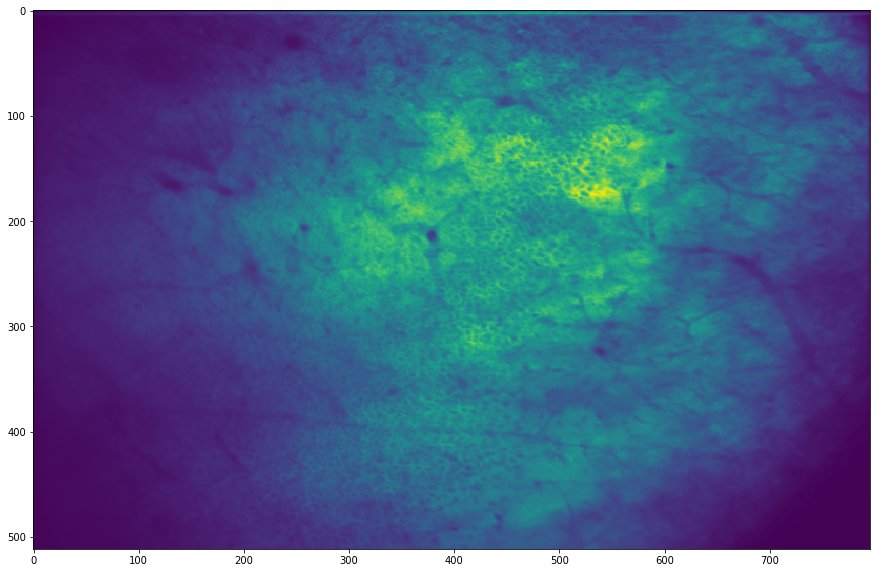

In [45]:
f,ax = plt.subplots(figsize=[15,15])
ax.imshow(ops['meanImg'])

In [68]:
print(info['max_idx'],np.arange(0,info['max_idx'],1000))
timesteps = np.arange(0,info['max_idx'],1000)

rowstep,colstep = 20, int(np.floor(rowstep*796./512.))
bin_mov = np.zeros((info['max_idx'],int(np.floor(mov.shape[1]/rowstep)),int(np.floor(mov.shape[2]/colstep))))


for t in timesteps.tolist():
    print(t)
    start,stop =t,np.minimum(t+1000,info['max_idx'])
    mov = s2p.utils.get_frames(ops,np.arange(start,stop),os.path.join(datadir,"data.bin")).astype(np.float)
    
    mov = mov[:,ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1]]
    
    
    for row_i, (row_start,row_stop) in enumerate(zip(range(0,mov.shape[1]+1-rowstep,rowstep),range(rowstep,mov.shape[1]+1,rowstep))):
        for col_i, (col_start,col_stop) in enumerate(zip(range(0,mov.shape[2]+1-colstep,colstep),range(colstep,mov.shape[2]+1,colstep))):
            bin_mov[start:stop,row_i,col_i] = mov[:,row_start:row_stop,col_start:col_stop].mean(axis=1,keepdims=True).mean(axis=2,keepdims=True).ravel()
    

12182 [    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [69]:
print(bin_mov.shape)

(12182, 25, 25)


In [41]:
mov = s2p.utils.get_frames(ops,np.arange(1000),os.path.join(datadir,"data.bin")).astype(np.float)

In [43]:
print(mov.shape)

(1000, 506, 784)


In [44]:
print(info.keys())

dict_keys(['frame', 'line', 'event_id', 'resfreq', 'postTriggerSamples', 'recordsPerBuffer', 'bytesPerBuffer', 'channels', 'ballmotion', 'abort_bit', 'scanbox_version', 'scanmode', 'config', 'sz', 'otwave', 'otwave_um', 'otparam', 'otwavestyle', 'volscan', 'power_depth_link', 'opto2pow', 'area_line', 'calibration', 'objective', 'messages', 'usernotes', 'nChan', 'max_idx', 'fr'])


In [42]:
mov = mov[:,ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1]]

In [61]:
rowstep,colstep = 20, int(np.floor(rowstep*796./512.))
bin_mov = np.zeros((1000,int(np.floor(mov.shape[1]/rowstep)),int(np.floor(mov.shape[2]/colstep))))
for row_i, (row_start,row_stop) in enumerate(zip(range(0,mov.shape[1]+1-rowstep,rowstep),range(rowstep,mov.shape[1]+1,rowstep))):
    for col_i, (col_start,col_stop) in enumerate(zip(range(0,mov.shape[2]+1-colstep,colstep),range(colstep,mov.shape[2]+1,colstep))):
        bin_mov[:,row_i,col_i] = mov[:,row_start:row_stop,col_start:col_stop].mean(axis=1,keepdims=True).mean(axis=2,keepdims=True).ravel()

In [70]:
# mov_sm = sp.ndimage.filters.gaussian_filter(mov,(0,10,15))
# mov_dff = utils.utilities.dff(mov_sm.reshape([mov_sm.shape[0],-1]))
bin_mov_dff = utils.utilities.dff(bin_mov.reshape([bin_mov.shape[0],-1]))

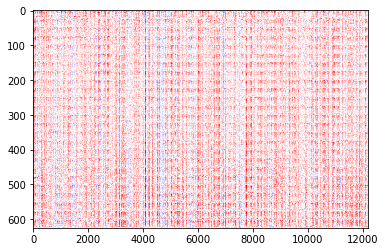

In [71]:
f,ax = plt.subplots()
ax.imshow(bin_mov_dff.T,aspect='auto',cmap='seismic',vmin=-.2,vmax=.2)

In [104]:
corrmat = 1/bin_mov_dff.shape[0]*np.matmul(sp.stats.zscore(bin_mov_dff,axis=0).T,sp.stats.zscore(bin_mov_dff,axis=0))

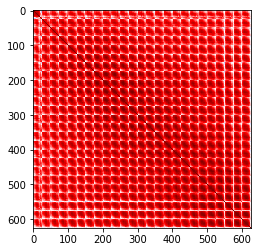

In [107]:
f,ax = plt.subplots()
ax.imshow(corrmat,vmin=-.8,vmax=.8,cmap='seismic')

In [118]:
meansignal = bin_mov_dff.mean(axis=1)

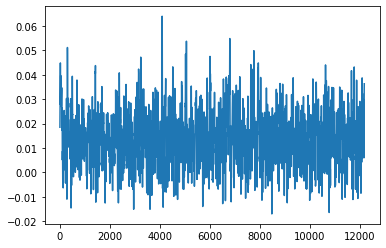

In [83]:
f,ax = plt.subplots()
ax.plot(np.median(bin_mov_dff,axis=1))

In [55]:
print(np.amax(bin_mov_dff[:-300,:]),np.amin(bin_mov_dff[:-300,:]))

0.22116878625655711 -0.11424419089624163


In [112]:
VRDat = utils.preprocessing._VR_align_to_2P_FlashLED(utils.preprocessing._get_frame(vrdata,fix_teleports=False),matfile)


num aberrant ttls 0.0
8.682920667003536 787.9401212733704
8.73168266801415 787.856493178373


C:\Users\markp\anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [113]:
print(VRDat.shape,info['max_idx'],bin_mov_dff.shape)
print(VRDat.columns)

(12182, 10) 12182 (12182, 625)
Index(['time', 'LEDCue', 'dz', 'lick', 'reward', 'gng', 'scanning',
       'manrewards', 'speed', 'lick rate'],
      dtype='object')


32.0


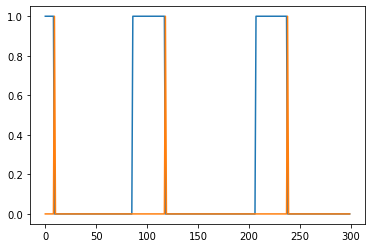

In [147]:
f,ax = plt.subplots()
ax.plot(VRDat['LEDCue']._values[300:600])
ax.plot(VRDat['reward']._values[300:600])

print(VRDat['LEDCue']._values[350:450].sum())

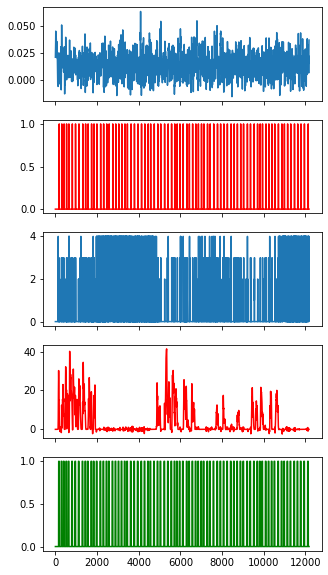

In [114]:
f,ax = plt.subplots(5,1,figsize=[5,10],sharex=True)
ax[0].plot(bin_mov_dff.mean(axis=1))
ax[3].plot(VRDat['speed']._values,color='red')
ax[4].plot(VRDat['LEDCue']._values>0,color='green')
ax[1].plot(VRDat['reward']._values,color='red')
ax[2].plot(VRDat['lick']._values)

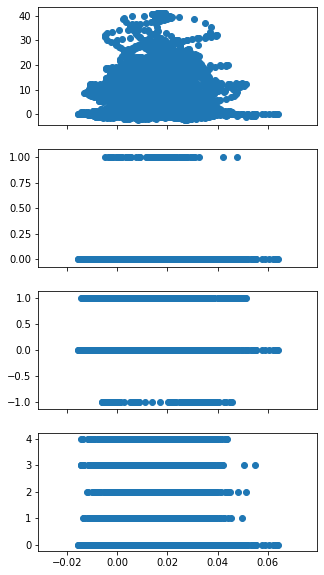

In [120]:
f,ax = plt.subplots(4,1,figsize=[5,10],sharex=True)
ax[0].scatter(meansignal,VRDat['speed']._values)
ax[1].scatter(meansignal,VRDat['reward']._values)
ax[2].scatter(meansignal,VRDat['LEDCue']._values)
ax[3].scatter(meansignal,VRDat['lick']._values)


In [148]:
rinds = np.where(VRDat['reward']>0)[0]
rtrigger_licks = np.zeros([rinds.shape[0],101])
rtrigger_dff = np.zeros([rinds.shape[0],101])

In [154]:
for i, rind in enumerate(rinds.tolist()):
    if rind+51<meansignal.size:
        rtrigger_dff[i,:]=meansignal[rind-50:(rind+51)]
        rtrigger_licks[i,:]=VRDat['lick']._values[rind-50:rind+51]

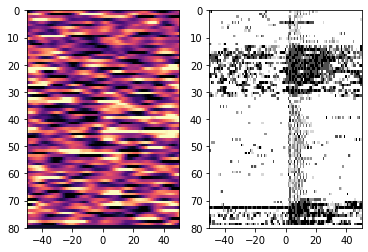

In [188]:
f,ax = plt.subplots(1,2)
ax[0].imshow(rtrigger_dff,cmap='magma',extent=[-50,50,rtrigger_dff.shape[0],0],aspect='auto',
             vmax=np.percentile(rtrigger_dff.ravel(),95),vmin=np.percentile(rtrigger_dff.ravel(),5))
ax[1].imshow(rtrigger_licks,cmap='Greys',extent=[-50,50,rtrigger_dff.shape[0],0],aspect='auto')
f.savefig("E:\\InVivoDA_results\\GRABDA1_13_03_2020_FlashLED_3_RewardTriggeredDFF.png")

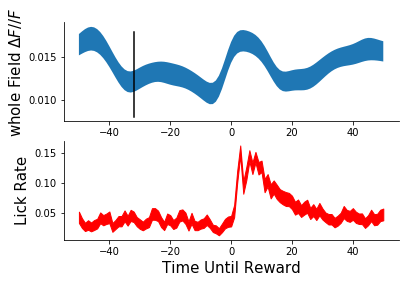

In [170]:
f,ax = plt.subplots(2,1)
mu,sem = rtrigger_dff.mean(axis=0),sp.stats.sem(rtrigger_dff,axis=0)
ax[0].fill_between(np.arange(-50,51),mu-sem,mu+sem)
ax[0].set_ylabel("whole Field ${\Delta F}//{F}$",fontsize=15)
ax[0].set_xlabel("Time Until Reward",fontsize=15)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].plot([-32,-32],[0.018,.008],color='black')

mu,sem = rtrigger_licks.mean(axis=0)/15.46,sp.stats.sem(rtrigger_licks/15.46,axis=0)
ax[1].fill_between(np.arange(-50,51),mu-sem,mu+sem,color='red')
ax[1].set_ylabel("Lick Rate",fontsize=15)
ax[1].set_xlabel("Time Until Reward",fontsize=15)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


f.savefig("E:\\InVivoDA_results\\GRABDA1_13_03_2020_FlashLED_3_RewardTriggeredDFF_mean.png")